### Data Generating Process

In [2]:
from rpy2.robjects.packages import STAP
from rpy2.robjects import numpy2ri
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
numpy2ri.activate()

In [4]:
with open("learning/simulateGP.R", "r") as f:
    string = f.read()
sampleDataFromG = STAP(string, "sampleDataFromG")

In [5]:
n = 500
G = np.array([[0, 1], [0, 0]], dtype="float64")
x = sampleDataFromG.sampleDataFromG(n, G)

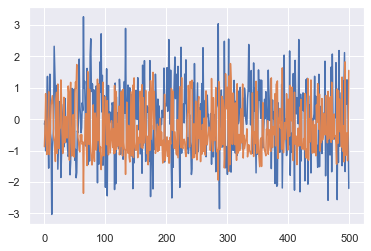

In [6]:
plt.plot(x)

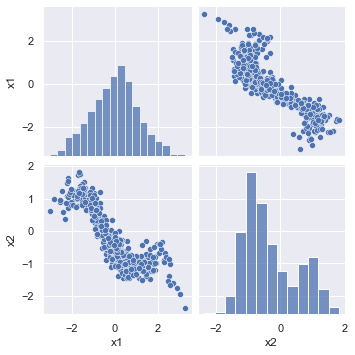

In [7]:
df_x = pd.DataFrame(x, columns=["x1", "x2"])
sns.pairplot(df_x)

In [8]:
n = 500
G = np.array([[0, 1, 1], [0, 0, 0], [0, 1, 0]], dtype="float64")
x = sampleDataFromG.sampleDataFromG(n, G)

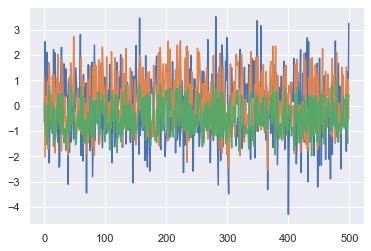

In [9]:
plt.plot(x)

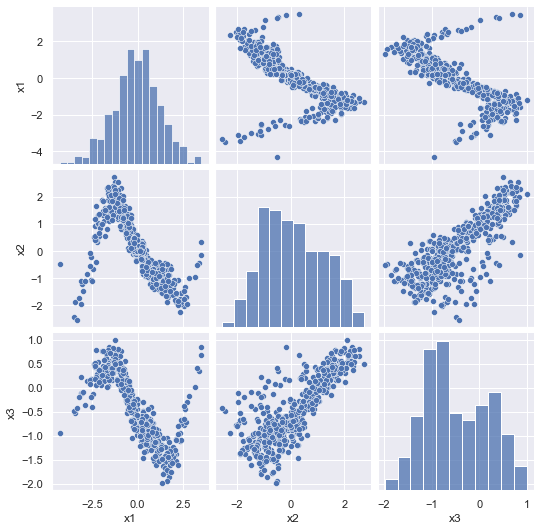

In [10]:
df_x = pd.DataFrame(x, columns=["x1", "x2", "x3"])
sns.pairplot(pd.DataFrame(df_x))

### MeDIL Algorithm

In [12]:
from exp.experiment import run_real

In [13]:
df_x

,x1,x2,x3
0,-0.640994,1.161981,0.095554
1,2.520322,-2.025255,-0.775994
2,0.828552,-0.866482,-0.723315
3,-0.095455,0.349800,-0.777775
4,2.097950,-1.102638,-1.524965
...,...,...,...
495,-1.799828,1.523909,0.429775
496,0.189580,-0.311956,-0.709881
497,1.330087,-0.645315,-1.492806
498,-0.553218,1.047517,-0.035784


In [ ]:
run_real("GP", num_samps_real, heuristic, method, alpha, dof, dof_method, exp_path, seed):